In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df_calories = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 25 - Calories Burnt Prediction\calories.csv')
df_exercises = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 25 - Calories Burnt Prediction\exercise.csv')

In [3]:
df_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df_exercises.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df = pd.merge(df_exercises, df_calories, on = 'User_ID', how = 'inner')

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [10]:
df['Gender'] = df['Gender'].apply(lambda x : 0 if x == 'male' else 1)

In [11]:
df['Gender']

0        0
1        1
2        0
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    0
14999    0
Name: Gender, Length: 15000, dtype: int64

<Axes: >

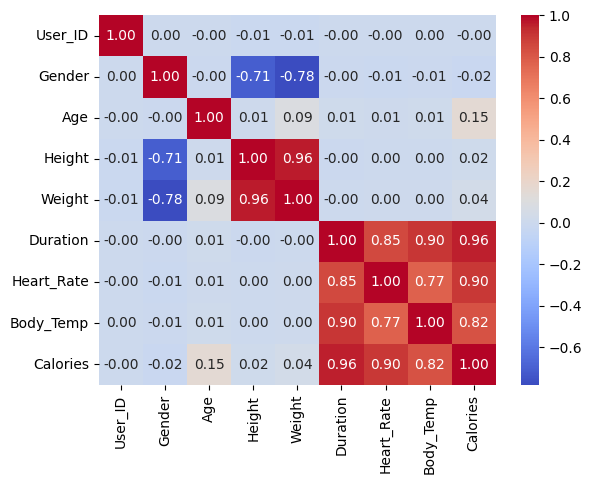

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt= '.2f')

# Gender has high negative correaltion with height and weight
# Height has high positive correlation with weight [will combine into BMI]
# Duration has positive correlation with heart rate, body temp and calories [will combine duration, heart rate and body temp into exercise intensity]
# Body temp has positive correaltion with calories as well as body temp.


In [13]:
df['BMI'] = df['Weight']/(df['Height']/100)**2
df['Intensity'] = (df['Duration'] + df['Heart_Rate']+ df['Body_Temp'])/3

In [14]:
df = df.drop(columns= ['Weight', 'Height', 'Duration', 'Heart_Rate', 'Body_Temp'])

In [31]:
df.head()

,User_ID,Gender,Age,Calories,BMI,Intensity
0,14733363,0,68,231.0,26.038781,58.266667
1,14861698,1,20,66.0,21.773842,49.433333
2,11179863,0,69,26.0,24.655910,43.900000
3,16180408,1,34,71.0,22.159109,51.166667
4,17771927,1,27,35.0,24.456063,43.600000


In [15]:
df.describe()

,User_ID,Gender,Age,Calories,BMI,Intensity
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,89.539533,24.344900,50.358196
std,2.872851e+06,0.500004,16.980264,62.456978,1.558784,5.971043
min,1.000116e+07,0.000000,20.000000,1.000000,19.227688,35.333333
25%,1.247419e+07,0.000000,28.000000,35.000000,23.243408,45.433333
50%,1.499728e+07,1.000000,39.000000,79.000000,24.376731,50.433333
75%,1.744928e+07,1.000000,56.000000,138.000000,25.492722,55.300000
max,1.999965e+07,1.000000,79.000000,314.000000,29.069767,66.300000


<Axes: >

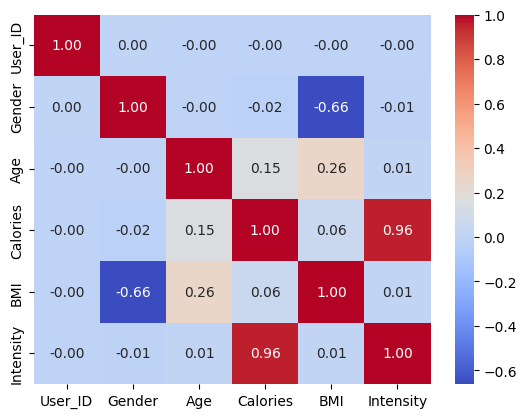

In [16]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt= '.2f')

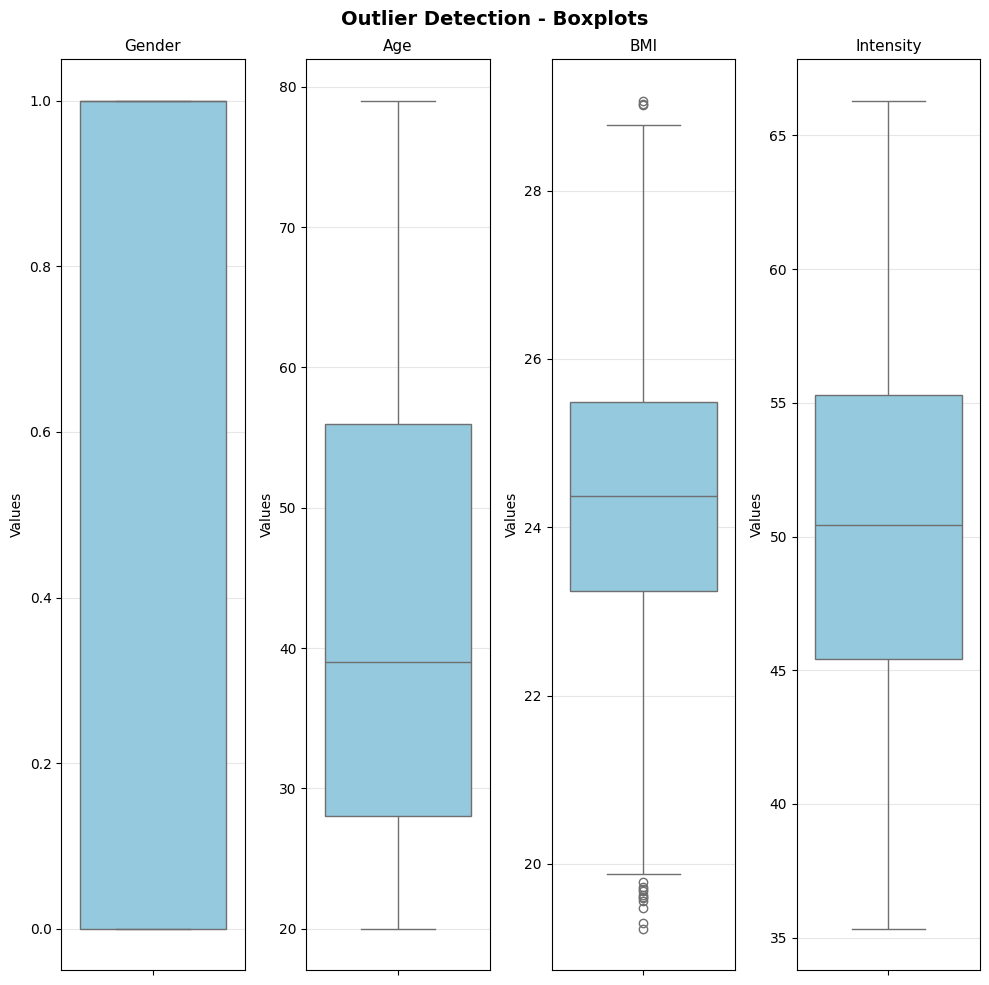

In [17]:
target_columns = ['Gender', 'Age', 'BMI', 'Intensity']
fig, axes = plt.subplots(1, 4, figsize = (10,10))
axes = axes.ravel()

for idx, feature in enumerate(target_columns):
    sns.boxplot(y = df[feature], ax = axes[idx], color = 'skyblue'
                )
    axes[idx].set_title(f'{feature}', fontsize = 11)
    axes[idx].set_ylabel('Values')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Outlier Detection - Boxplots', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
df[df['BMI'] > 28.5]

# still accepted, within BMI threshold, age within range

,User_ID,Gender,Age,Calories,BMI,Intensity
4534,16109947,0,78,5.0,29.025311,39.200000
4723,12004679,0,61,43.0,29.017447,45.500000
10603,17455237,0,73,233.0,29.069767,58.366667
11567,10886594,0,71,100.0,28.634039,50.733333
12124,10286803,0,61,9.0,28.787152,41.066667


<Axes: xlabel='Calories', ylabel='Count'>

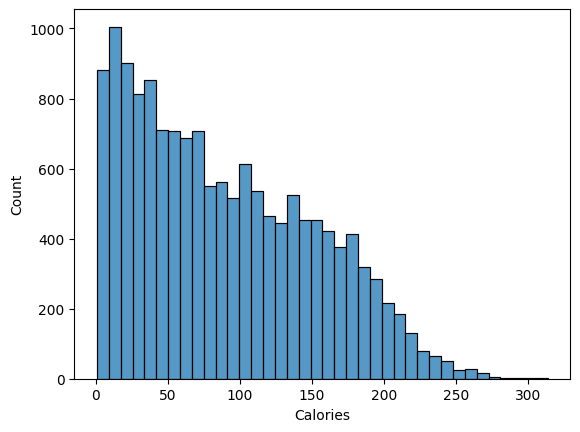

In [19]:
sns.histplot(df['Calories'])

# right skewed, need to normalize through log transformation

In [20]:
X = df[['Gender', 'Age', 'BMI', 'Intensity']]
y = np.log1p(df['Calories'])

<Axes: xlabel='Calories', ylabel='Count'>

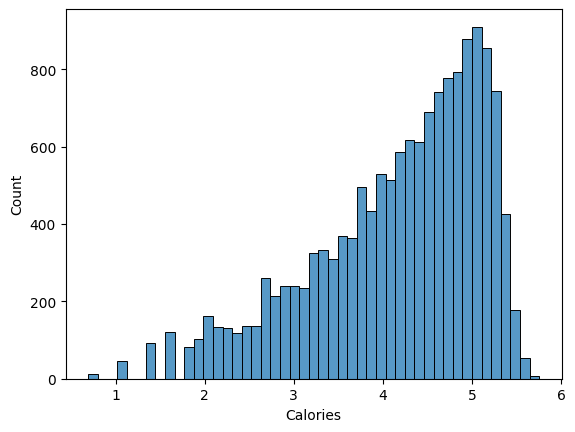

In [21]:
sns.histplot(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    'Linear Regression':{
        'model': LinearRegression(),
        'params':{}
    },
    'Ridge':{
        'model': Ridge(random_state= 2),
        'params':{
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }

    },
    'Lasso':{
        'model': Lasso(random_state= 2),
        'params':{
            'alpha':[0.1, 1.0, 10.0, 100.0]
        }
    },
    'Random Forest':{
        'model': RandomForestRegressor(random_state= 2),
        'params':{
            'max_depth': [None, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2],
            'n_estimators': [50, 100, 200],
            'max_features': ['sqrt', 0.8]
        }
    },
    'XGBRegressor':{
        'model': XGBRegressor(random_state = 2),
        'params':{
            'max_depth': [3, 5, 6],
            'learning_rate':[0.05, 0.1],
            'n_estimators':[100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree':[0.8, 1.0]
        }
    },
    'SVM': {
        'model': SVR(),
        'params':{
            'C':[0.1, 1, 10],
            'kernel': ['rbf'],
            'gamma':['scale']
        }
    }
}

In [25]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'neg_mean_absolute_error',
        n_jobs = -1,
        verbose = 1
    )

    grid_search.fit(X_train, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred_log = grid_search.best_estimator_.predict(X_train)
    test_pred_log = grid_search.best_estimator_.predict(X_test)

    train_pred_original = np.expm1(train_pred_log)
    test_pred_original = np.expm1(test_pred_log)

    y_train_original = np.expm1(y_train)
    y_test_original = np.expm1(y_test)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'Train MAE': mean_absolute_error(y_train_original, train_pred_original),
        'Test MAE': mean_absolute_error(y_test_original, test_pred_original),
        'Train R2': r2_score(y_train_original, train_pred_original),
        'Test R2': r2_score(y_test_original, test_pred_original),
        'Train RMSE': np.sqrt(mean_squared_error(y_train_original, train_pred_original)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test_original, test_pred_original))
    
    }

best_model_name = max(results.keys(), key = lambda x: results[x]['Test R2'])
best_model = results[best_model_name]['best_model']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [26]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Test R2': result['Test R2'],
        'Test RMSE': result['Test RMSE'],
        'Overfit Gap': result['Train R2'] - result['Test R2']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test R2', ascending = False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Test R2,Test RMSE,Overfit Gap
3,Random Forest,0.9842,7.8836,0.0048
4,XGBRegressor,0.9841,7.9074,0.0004
5,SVM,0.9828,8.2218,-0.0005
2,Lasso,0.7850,29.0579,0.0040
1,Ridge,0.7395,31.9896,0.0057
0,Linear Regression,0.7386,32.0430,0.0057


In [33]:
def predict_calories (model, gender, age, bmi, intensity):
    input_data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age], 
        'BMI': [bmi],
        'Intensity': [intensity]})
    prediction_log = model.predict(input_data)
    prediction_calories = np.expm1(prediction_log)[0]
    return prediction_calories

calories_pred = predict_calories(best_model,
                                 gender = 1,
                                 age = 20,
                                 bmi = 21.773842,
                                 intensity = 49.433333)
print(f'Predicted calories burned: {calories_pred: 2f}')

Predicted calories burned:  65.197773


In [32]:
df.head()

,User_ID,Gender,Age,Calories,BMI,Intensity
0,14733363,0,68,231.0,26.038781,58.266667
1,14861698,1,20,66.0,21.773842,49.433333
2,11179863,0,69,26.0,24.655910,43.900000
3,16180408,1,34,71.0,22.159109,51.166667
4,17771927,1,27,35.0,24.456063,43.600000
